In [1]:
import pprint
import matplotlib.pyplot as plt

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(f"{x:3d}" for x in row))

def plot_matrix(matrix):
    plt.figure(figsize=(12,8))
    plt.imshow(matrix)
    plt.colorbar(label="Score")
    plt.show()

def calc_needleman_wunsch_simple_dna(seq1, seq2):
    blank = -2
    hit = 1
    miss = -1

    matrix = [[0 for j in range(len(seq2)+1)] for i in range(len(seq1)+1)]

    for v in range(len(seq1)+1):
        matrix[v][0] = v * (-2)

    for v in range(len(seq2)+1):
        matrix[0][v] = v * (-2)

    for i in range(1, len(seq1)+1):
        for j in range(1, len(seq2)+1):
            if seq1[i-1] == seq2[j-1]:
                diagonal = matrix[i-1][j-1] + hit
            else:
                diagonal = matrix[i-1][j-1] + miss
            over = matrix[i-1][j] + blank
            left = matrix[i][j-1] + blank
            matrix[i][j] = max(diagonal, over, left)


    plot_matrix(matrix)
    return matrix[i][j]

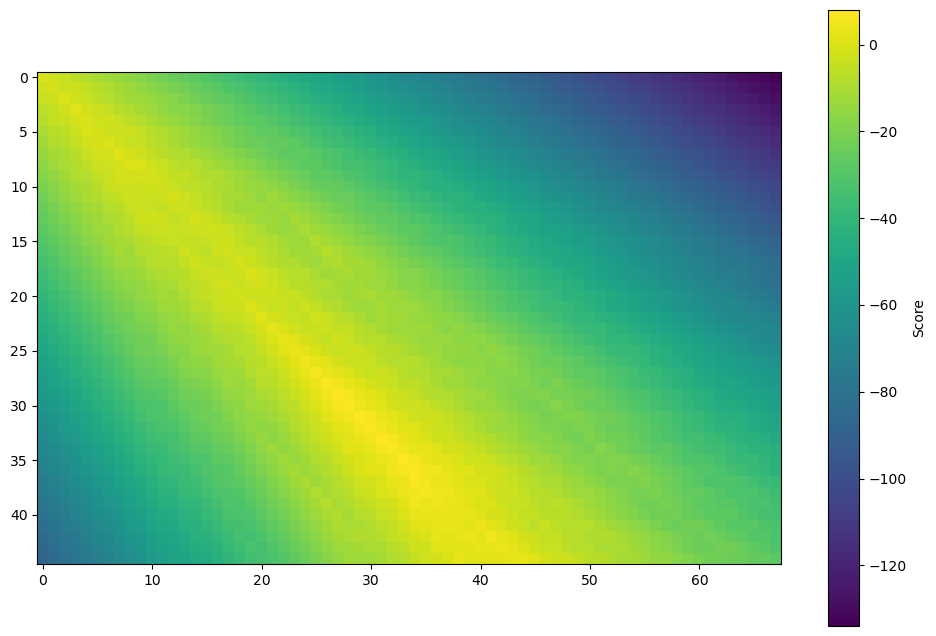

-28

In [2]:
calc_needleman_wunsch_simple_dna("GTGACAGTGACATGAGTGGTGACATGAGAGTGACATGAGGATGC", "ATGCGAGCTTTCGTTGGTGACATGAGACTTATAGCTACTATTTCTAGCTACTATTTCCCATCGTACC")
